In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

In [3]:
with pd.HDFStore("C:/Kaggle/train/train.h5", "r") as train:
    df = train.get("train")

In [9]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0,NaN,-0.007338


In [6]:
cols = [0, 0, 0]
for c in df.columns:
    if 'derived' in c: cols[0] += 1
    if 'fundamental' in c: cols[1] += 1
    if 'technical' in c: cols[2] += 1
print('Derived columns: {}, Fundamental columns: {}, Technical columns: {}'.format(*cols))
print('\nColumn dtypes:')
print(df.dtypes.value_counts())
print('\nint16 columns:')
print(df.columns[df.dtypes == 'int16'])

Derived columns: 5, Fundamental columns: 63, Technical columns: 40

Column dtypes:
float32    109
int16        2
dtype: int64

int16 columns:
Index([u'id', u'timestamp'], dtype='object')


Target value min -0.086 max 0.093 mean 0.000 std 0.022


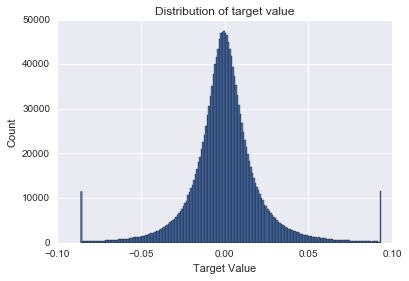

In [14]:
y = df['y'].values
plt.hist(y, bins = 200)
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of target value')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))
plt.show()

**The weired things is it very very symmetric and have so fatter tail on both sides!**